In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('cleaned_data.csv')
df = df.drop(['Unnamed: 0','Title'],axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         626 non-null    float64
 1   No. Reviews   626 non-null    int64  
 2   Display size  626 non-null    float64
 3   Storage type  626 non-null    object 
 4   CPU Speed     626 non-null    float64
 5   RAM           626 non-null    int64  
 6   Rating        626 non-null    float64
 7   Brand         626 non-null    object 
 8   graphics      626 non-null    int64  
 9   Processor     626 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 49.0+ KB


### Getting Dummies for Categorical features

In [4]:
df = pd.get_dummies(data = df)
df.columns

Index(['Price', 'No. Reviews', 'Display size', 'CPU Speed', 'RAM', 'Rating',
       'graphics', 'Storage type_EMMC',
       'Storage type_Flash Memory Solid State', 'Storage type_HDD',
       'Storage type_Others', 'Storage type_SATA', 'Storage type_SSD',
       'Brand_acer', 'Brand_apple', 'Brand_asus', 'Brand_dell', 'Brand_hp',
       'Brand_lenovo', 'Brand_other_brand', 'Processor_amd', 'Processor_i3',
       'Processor_i5', 'Processor_i7', 'Processor_i9', 'Processor_unknown'],
      dtype='object')

### Importing Necessary libraries

In [5]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

### Creating train test split for our model

In [6]:
X = df.drop('Price',axis=1)
y = df.Price.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
def get_metrics(model):
    y_pred = model.predict(X_test)
    print("The R2 score : ", r2_score(y_test,y_pred))
    print("The mean Absoulte error : ", mean_absolute_error(y_test,y_pred))

### Multiple Linear Regression

In [8]:
linreg = LinearRegression().fit(X_train,y_train)

get_metrics(linreg)

The R2 score :  0.6520168207165385
The mean Absoulte error :  252.64305071457926


### Lets scale the data for Lasso

In [9]:
# Lets scale the data
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Lasso Regression

In [10]:
lasso = Lasso(alpha=0.1).fit(X_train,y_train)

get_metrics(lasso)

The R2 score :  0.6525583667971754
The mean Absoulte error :  252.2498251645211


### Finding the best value for alpha

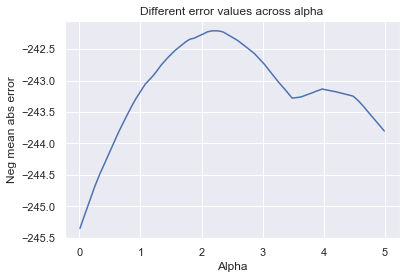

In [11]:
alpha = []
error = []
for i in range(1,500):
    alpha.append(i/100)
    lasso = Lasso(alpha=i/100, max_iter=10000)
    error.append(cross_val_score(lasso, X, y, scoring = 'neg_mean_absolute_error', cv=5).mean())
plt.title("Different error values across alpha")
plt.xlabel("Alpha")
plt.ylabel('Neg mean abs error')
plt.plot(alpha,error)
plt.show()

In [12]:
best_alpha = alpha[np.argmax(error)]
print("Best alpha value for Lasso: ",best_alpha)

lasso = Lasso(alpha=best_alpha, max_iter = 10000).fit(X_train,y_train)
get_metrics(lasso)

Best alpha value for Lasso:  2.24
The R2 score :  0.6573820020395582
The mean Absoulte error :  245.89965081551324


### Random Forest Regressor

In [13]:
rf = RandomForestRegressor().fit(X_train,y_train)
get_metrics(rf)

The R2 score :  0.7446839763810786
The mean Absoulte error :  173.72607403368798
